<a href="https://colab.research.google.com/github/IrinaChen/Banking-Analytics-2020---Credit-Risk-Analytics/blob/main/%E2%80%9CCoursework2%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

loan_data = pd.read_csv("/content/drive/My Drive/FiveYearData.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,33,34,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Import all the packages we need
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
loan_data = loan_data.drop(loan_data.columns[0], axis = 1)

In [ ]:
loan_data = loan_data.rename(columns = {'fico': 'CreditScore', 'dt_first_pi': 'FirstPaymentDate',
                'flag_fthb':'FirstHome', 'dt_matr': 'MaturityDate',
                'cd_msa': 'GeoCode', 'mi_pct': 'LossCoverage',
                'cnt_units': 'LoanNum', 'occpy_sts': 'MortgageType',
                'orig_upb': 'upb', 'int_rt': 'InterestRate',
                'ppmt_pnlty': 'PenaltyPrePayment', 'st': 'state',
                'orig_loan_term': 'LoanMonthlyLeft','cnt_borr': 'NumBorrower',
                'flag_sc': 'ExceedMortgage'})

In [ ]:
loan_data_predictors = loan_data.iloc[:, np.r_[0:26,-1]]

In [ ]:
# Convert Default variable
loan_data_predictors["Default"] = np.where(loan_data_predictors["Default"]=="NO",0,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["InterestRate",
                            "LossCoverage","FirstPaymentDate",
                            "MaturityDate","LoanMonthlyLeft"])

In [ ]:
index2 = loan_data_predictors[loan_data_predictors["PenaltyPrePayment"].isnull()].index.tolist()

In [ ]:
for i in index2:
  loan_data_predictors["PenaltyPrePayment"][i] = "Y"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
loan_data_predictors["PenaltyPrePayment"] = loan_data_predictors["PenaltyPrePayment"].astype("str")

In [ ]:
index2 = loan_data_predictors[loan_data_predictors['zipcode'].isnull()].index.tolist()

In [ ]:
index2

[101826, 1217636, 1250355, 1320511, 1600540]

In [ ]:
loan_data_predictors.head(3)

,id_loan,CreditScore,FirstHome,GeoCode,LoanNum,MortgageType,cltv,dti,upb,ltv,channel,PenaltyPrePayment,prod_type,state,prop_type,zipcode,loan_purpose,NumBorrower,seller_name,servicer_name,ExceedMortgage,Default
0,F114Q1000001,717,9,39300.0,1,I,77,41,107000,77,R,N,FRM,RI,SF,2800.0,P,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NaN,1
1,F114Q1000002,813,Y,19780.0,1,P,95,32,165000,95,R,N,FRM,IA,SF,50300.0,P,1,Other sellers,Other servicers,NaN,1
2,F114Q1000004,742,9,NaN,1,P,78,45,139000,78,R,N,FRM,KY,SF,42100.0,C,1,Other sellers,Other servicers,NaN,1


In [ ]:
loan_data_predictors.iloc[101826,15]

66615.0

In [ ]:
# cd_msa = 45820 -> Kansas in the Topeka metro area
loan_data_predictors.iloc[101826,15] = 66615

In [ ]:
# cd_msa = 33460 -> Minneapolis-St. Paul-Bloomington, MN-WI (Metro Area)
loan_data_predictors.iloc[1217636,15] = 55104

In [ ]:
# cd_msa = 19740 -> Denver-Aurora, CO (Metro Area)
loan_data_predictors.iloc[1250355,15] = 80012

In [ ]:
# cd_msa = 22744 ->	Fort Dodge, IA (Micro Area)
loan_data_predictors.iloc[1320511,15] = 50501

In [ ]:
# cd_msa = 33460 ->	Minneapolis-St. Paul-Bloomington, MN-WI (Metro Area)
loan_data_predictors.iloc[1600540,15] = 55104

In [ ]:
null_columns = loan_data_predictors.columns[loan_data_predictors.isnull().any()]
loan_data_predictors[null_columns].isnull().sum()

GeoCode            210048
ExceedMortgage    2011435
dtype: int64

In [ ]:
loan_data_predictors["zipcode"] = loan_data_predictors["zipcode"].astype("int")

In [ ]:
loan_data_predictors["zipcode"] = loan_data_predictors["zipcode"].astype("str")

In [ ]:
loan_data_predictors["zipcode"].isnull().any()

False

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["GeoCode"])

In [ ]:
loan_data_predictors["ExceedMortgage"] = np.where(loan_data_predictors["ExceedMortgage"] == "Y","Y","N")

In [ ]:
loan_data_predictors["ExceedMortgage"] = loan_data_predictors["ExceedMortgage"].astype("str")

In [ ]:
# Replace invalid outlier CreditScore
loan_data_predictors.CreditScore.values[loan_data_predictors.CreditScore.values == 9999] = 758

In [ ]:
# Replace invalid outlier LoanNum
loan_data_predictors.LoanNum.values[loan_data_predictors.LoanNum.values == 99] = 1

In [ ]:
# Replace invalid outlier CLTV
loan_data_predictors.cltv.values[loan_data_predictors.cltv.values == 999] = 80

In [ ]:
# Replace invalid outlier LTV
loan_data_predictors.ltv.values[loan_data_predictors.ltv.values == 999] = 79

In [ ]:
# Replace invalid outlier LTV
loan_data_predictors.dti.values[loan_data_predictors.dti.values == 999] = 36

In [ ]:
# Write a proper expression in panadas for cut-off values:
loan_data_predictors = loan_data_predictors.loc[(loan_data_predictors["CreditScore"] >= 550) &
 (loan_data_predictors["dti"] <= 51) &
 (loan_data_predictors["cltv"] <= 115) &
 (loan_data_predictors["upb"] <= 1300000) &
  (loan_data_predictors["ltv"] <= 115)]

In [ ]:
#loan_data_predictors["PrincipalPayment"] = loan_data_predictors["upb"] / \
#loan_data_predictors["LoanMonthlyLeft"]

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["upb"])

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["ltv"])

In [ ]:
loan_data_predictors.head(3)

,id_loan,CreditScore,FirstHome,LoanNum,MortgageType,cltv,dti,channel,PenaltyPrePayment,prod_type,state,prop_type,zipcode,loan_purpose,NumBorrower,seller_name,servicer_name,ExceedMortgage,Default
0,F114Q1000001,717,9,1,I,77,41,R,N,FRM,RI,SF,2800,P,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",N,0
1,F114Q1000002,813,Y,1,P,95,32,R,N,FRM,IA,SF,50300,P,1,Other sellers,Other servicers,N,1
2,F114Q1000004,742,9,1,P,78,45,R,N,FRM,KY,SF,42100,C,1,Other sellers,Other servicers,N,0


In [ ]:
# Install the package we need for WoE:
!pip install scorecardpy

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp36-none-any.whl size=57827 sha256=d04cd8acbfb9ef707f5e4dd7ab1613b4e25780a1d5674f5a4d1fbeb919b1485b
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [ ]:
import scorecardpy as sc

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["prod_type",
                            "PenaltyPrePayment"])

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["ExceedMortgage",
                            "channel",
                            "MortgageType","prop_type",
                            "LoanNum"])

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["loan_purpose","FirstHome"])

In [ ]:
loan_data_predictors["NumBorrower"] = loan_data_predictors["NumBorrower"].astype("str")

In [ ]:
loan_data_predictors.dtypes

id_loan          object
CreditScore       int64
cltv              int64
dti               int64
zipcode          object
NumBorrower      object
servicer_name    object
Default           int64
dtype: object

In [ ]:
np.where(loan_data_predictors.isnull()== True)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
loan_data_predictors = loan_data_predictors.drop(columns = ["seller_name",
                        "state"])

In [ ]:
train, test = sc.split_df(loan_data_predictors.iloc[: , 1:],
               y = "Default",
               ratio = 0.7, 
               seed = 250747350).values()

In [ ]:
train.head(3)

,CreditScore,cltv,dti,state,zipcode,NumBorrower,seller_name,servicer_name,Default
1,813,95,32,IA,50300,1,Other sellers,Other servicers,1
2,742,78,45,KY,42100,1,Other sellers,Other servicers,0
3,735,86,45,MN,55000,2,Other sellers,Other servicers,0


In [ ]:
train.dtypes

CreditScore       int64
cltv              int64
dti               int64
state            object
zipcode          object
NumBorrower      object
seller_name      object
servicer_name    object
Default           int64
dtype: object

In [ ]:
bins = sc.woebin(train, y = 'Default', 
                 min_perc_fine_bin=0.01, # 100 bins
                 min_perc_coarse_bin=0.05, #.0.05
                 # each final bin contains 2.5% inforamtion
                 stop_limit=0.0125, # Minimum information value 0.0125
                 max_num_bin=20, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
state, zipcode
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 1469012 rows and 9 columns in 00:01:37


{'CreditScore': <Figure size 432x288 with 2 Axes>,
 'NumBorrower': <Figure size 432x288 with 2 Axes>,
 'cltv': <Figure size 432x288 with 2 Axes>,
 'dti': <Figure size 432x288 with 2 Axes>,
 'seller_name': <Figure size 432x288 with 2 Axes>,
 'servicer_name': <Figure size 432x288 with 2 Axes>,
 'state': <Figure size 432x288 with 2 Axes>,
 'zipcode': <Figure size 432x288 with 2 Axes>}

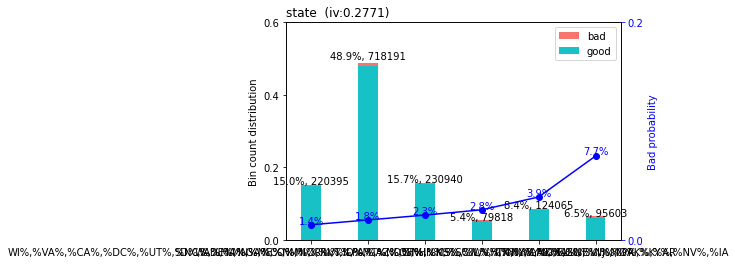

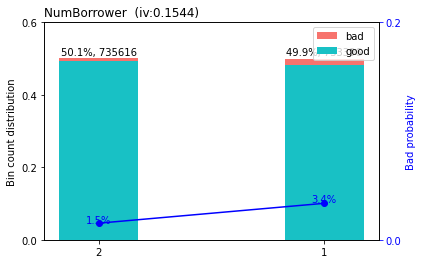

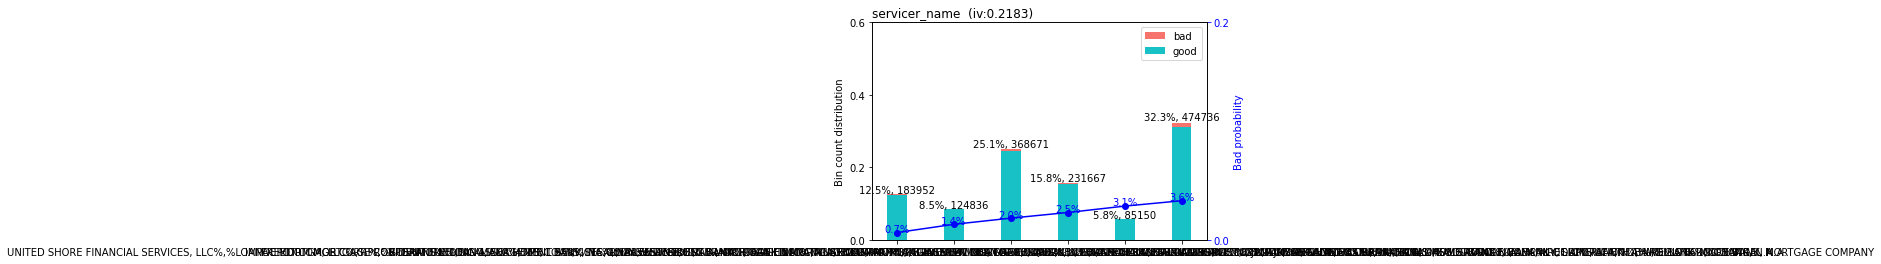

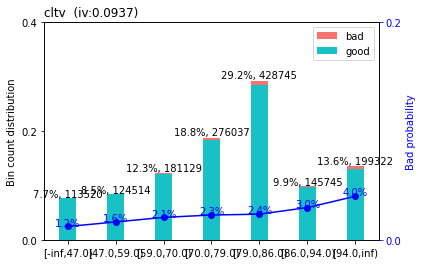

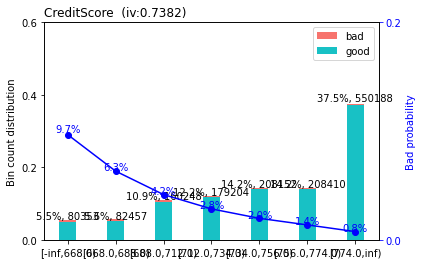

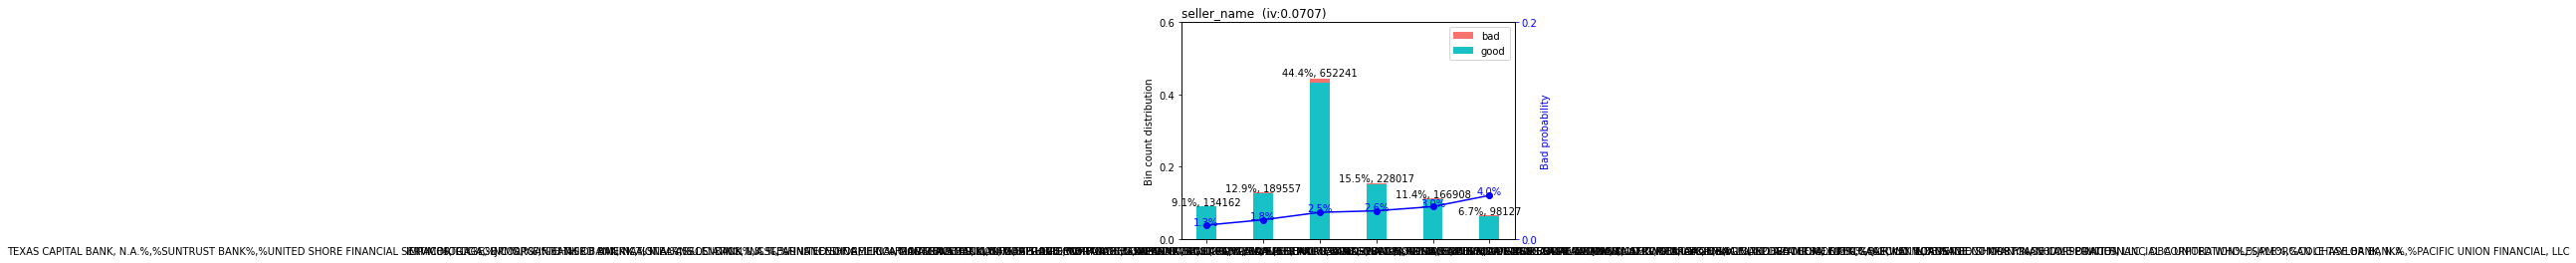

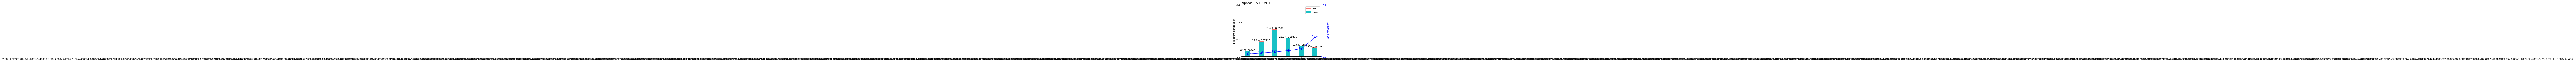

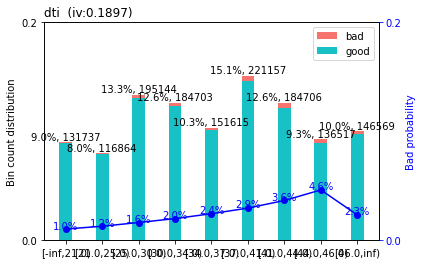

In [ ]:
sc.woebin_plot(bins)

In [ ]:
# Group up 
groups_zipcode = pd.DataFrame(bins.get('zipcode')['bin'])
groups_zipcode['Group name'] = ['zipcode_A', 'zipcode_B', 'zipcode_C','zipcode_D',
                   'zipcode_E', 'zipcode_F']
groups_zipcode

,bin,Group name
0,"99900%,%16900%,%24800%,%89300%,%88400%,%87900%...",zipcode_A
1,"26700%,%82200%,%27700%,%84300%,%83600%,%3800%,...",zipcode_B
2,"45200%,%80000%,%27300%,%21500%,%48800%,%43500%...",zipcode_C
3,"69300%,%24200%,%16100%,%48000%,%66600%,%12100%...",zipcode_D
4,"46300%,%14200%,%73400%,%93500%,%61900%,%95200%...",zipcode_E
5,"28300%,%68300%,%2200%,%5100%,%68900%,%62800%,%...",zipcode_F


In [ ]:
sc.woebin_plot(bins.get('zipcode'))
plt.xticks(np.arange(8), ['zipcode_A', 'zipcode_B', 'zipcode_C','zipcode_D',
                   'zipcode_E', 'zipcode_F', 'zipcode_G','zipcode_H'])

In [ ]:
groups_seller_name = pd.DataFrame(bins.get('seller_name')['bin'])
groups_seller_name['Group name'] = ['seller_name_A', 'seller_name_B', 'seller_name_C','seller_name_D',
                       'seller_name_E', 'seller_name_F']
groups_seller_name

,bin,Group name
0,"TEXAS CAPITAL BANK, N.A.%,%SUNTRUST BANK%,%UNI...",seller_name_A
1,"IMPAC MORTGAGE CORP.%,%BANK OF AMERICA, N.A.%,...",seller_name_B
2,"NATIONSTAR MORTGAGE LLC%,%BRANCH BANKING & TRU...",seller_name_C
3,"FLAGSTAR BANK, FSB%,%WELLS FARGO BANK, N.A.%,%...",seller_name_D
4,"FRANKLIN AMERICAN MORTGAGE COMPANY%,%STEARNS L...",seller_name_E
5,"CITIMORTGAGE, INC.%,%FIFTH THIRD BANK%,%STEARN...",seller_name_F


In [ ]:
groups_servicer_name = pd.DataFrame(bins.get('servicer_name')['bin'])
groups_servicer_name['Group name'] = ['servicer_name_A', 'servicer_name_B',
                      'servicer_name_C','servicer_name_D',
                     'servicer_name_E','servicer_name_F']
groups_servicer_name

,bin,Group name
0,"UNITED SHORE FINANCIAL SERVICES, LLC%,%LOANDEP...",servicer_name_A
1,"RUSHMORE LOAN MANAGEMENT SERVICES, LLC%,%SUNTR...",servicer_name_B
2,"IMPAC MORTGAGE CORP.%,%STEARNS LENDING, LLC%,%...",servicer_name_C
3,"FREEDOM MORTGAGE CORPORATION%,%CALIBER HOME LO...",servicer_name_D
4,"SENECA MORTGAGE SERVICING, LLC%,%QUICKEN LOANS...",servicer_name_E
5,"Other servicers%,%BRANCH BANKING & TRUST COMPA...",servicer_name_F


([<matplotlib.axis.XTick at 0x7fc620b5f320>,
 [Text(0, 0, 'seller_name_A'),
  Text(0, 0, 'seller_name_B'),
  Text(0, 0, 'seller_name_C'),
  Text(0, 0, 'seller_name_D'),
  Text(0, 0, 'seller_name_E'),
  Text(0, 0, 'seller_name_F')])

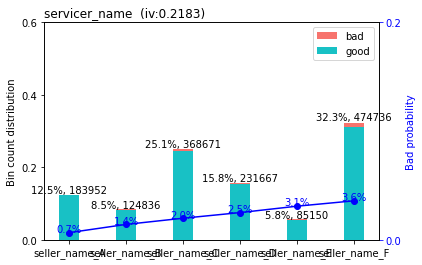

In [ ]:
sc.woebin_plot(bins.get('servicer_name'))
plt.xticks(np.arange(6), ['seller_name_A', 'seller_name_B', 'seller_name_C','seller_name_D',
                       'seller_name_E', 'seller_name_F'])

([<matplotlib.axis.XTick at 0x7fc7270832b0>,
 [Text(0, 0, 'seller_name_A'),
  Text(0, 0, 'seller_name_B'),
  Text(0, 0, 'seller_name_C'),
  Text(0, 0, 'seller_name_D'),
  Text(0, 0, 'seller_name_E'),
  Text(0, 0, 'seller_name_F')])

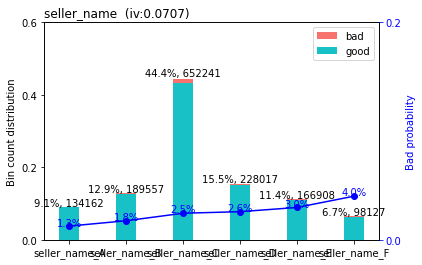

In [ ]:
sc.woebin_plot(bins.get('seller_name'))
plt.xticks(np.arange(6), ['seller_name_A', 'seller_name_B', 'seller_name_C','seller_name_D',
                       'seller_name_E', 'seller_name_F'])

In [ ]:
groups_st = pd.DataFrame(bins.get('state')['bin'])
groups_st['Group name'] = ['st_A', 'st_B', 'st_C','st_D','st_E','st_F']
groups_st

,bin,Group name
0,"WA%,%MN%,%CO%,%OR%,%ID%,%AZ%,%NH",st_A
1,"WI%,%VA%,%CA%,%DC%,%UT%,%NC%,%MA%,%ME%,%MI%,%V...",st_B
2,"SD%,%DE%,%GA%,%NM%,%RI%,%PA%,%ND%,%IN%,%SC%,%H...",st_C
3,"CT%,%MS%,%WV%,%NY%,%OK",st_D
4,"TX%,%LA%,%GU",st_E
5,"FL%,%VI%,%PR",st_F


In [ ]:
test = bins.get('state').iloc[1,1]
test

'WI%,%VA%,%CA%,%DC%,%UT%,%NC%,%MA%,%ME%,%MI%,%VT%,%MT%,%OH%,%KS%,%IL%,%TN%,%MD%,%NE%,%MO%,%KY%,%NV%,%IA'

([<matplotlib.axis.XTick at 0x7f9787001470>,
 [Text(0, 0, 'st_A'),
  Text(0, 0, 'st_B'),
  Text(0, 0, 'st_C'),
  Text(0, 0, 'st_D'),
  Text(0, 0, 'st_E'),
  Text(0, 0, 'st_F')])

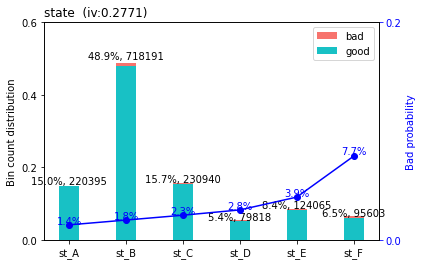

In [ ]:
sc.woebin_plot(bins.get('state'))
plt.xticks(np.arange(6), ['st_A', 'st_B', 'st_C','st_D','st_E','st_F'])

In [ ]:
bins.get("state")

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,state,"WA%,%MN%,%CO%,%OR%,%ID%,%AZ%,%NH",220395,0.150029,217345,3050,0.013839,-0.578335,0.038518,0.277062,"WA%,%MN%,%CO%,%OR%,%ID%,%AZ%,%NH",False
1,state,"WI%,%VA%,%CA%,%DC%,%UT%,%NC%,%MA%,%ME%,%MI%,%V...",718191,0.488894,705075,13116,0.018263,-0.296462,0.037419,0.277062,"WI%,%VA%,%CA%,%DC%,%UT%,%NC%,%MA%,%ME%,%MI%,%V...",False
2,state,"SD%,%DE%,%GA%,%NM%,%RI%,%PA%,%ND%,%IN%,%SC%,%H...",230940,0.157208,225695,5245,0.022712,-0.073900,0.000829,0.277062,"SD%,%DE%,%GA%,%NM%,%RI%,%PA%,%ND%,%IN%,%SC%,%H...",False
3,state,"CT%,%MS%,%WV%,%NY%,%OK",79818,0.054334,77617,2201,0.027575,0.125134,0.000903,0.277062,"CT%,%MS%,%WV%,%NY%,%OK",False
4,state,"TX%,%LA%,%GU",124065,0.084455,119182,4883,0.039358,0.493117,0.026139,0.277062,"TX%,%LA%,%GU",False
5,state,"FL%,%VI%,%PR",95603,0.065080,88238,7365,0.077037,1.204710,0.173253,0.277062,"FL%,%VI%,%PR",False


-------- 1/8 CreditScore --------
>>> dt[CreditScore].describe(): 
count    1.469012e+06
mean     7.494671e+02
std      4.520104e+01
min      5.530000e+02
25%      7.170000e+02
50%      7.580000e+02
75%      7.870000e+02
max      8.390000e+02
Name: CreditScore, dtype: float64 



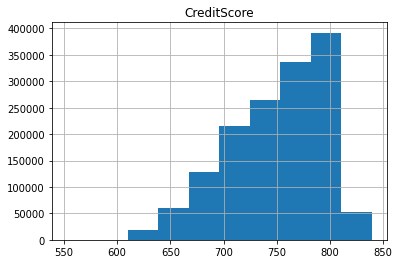

>>> Current breaks:
668.0,688.0,712.0,734.0,756.0,774.0 



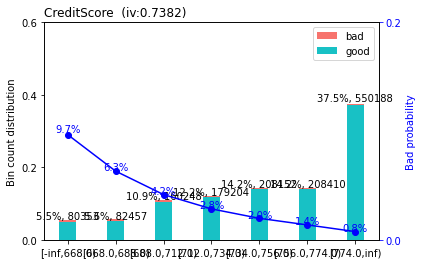

>>> Adjust breaks for (1/8) CreditScore?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/8 seller_name --------
>>> dt[seller_name].describe(): 
count           1469012
unique               48
top       Other sellers
freq             545339
Name: seller_name, dtype: object 

>>> dt[seller_name].value_counts(): 
Other sellers                                                   545339
WELLS FARGO BANK, N.A.                                          189799
JPMORGAN CHASE BANK, N.A.                                        91863
QUICKEN LOANS INC.                                               74578
U.S. BANK N.A.                                                   71513
CALIBER HOME LOANS, INC.                                         54312
BANK OF AMERICA, N.A.                                            53682
BRANCH BANKING & TRUST COMPANY                                   46966
AMERIHOME MORTGAGE COMPANY, LLC                                  39662
LOANDEPOT.COM, LLC                             

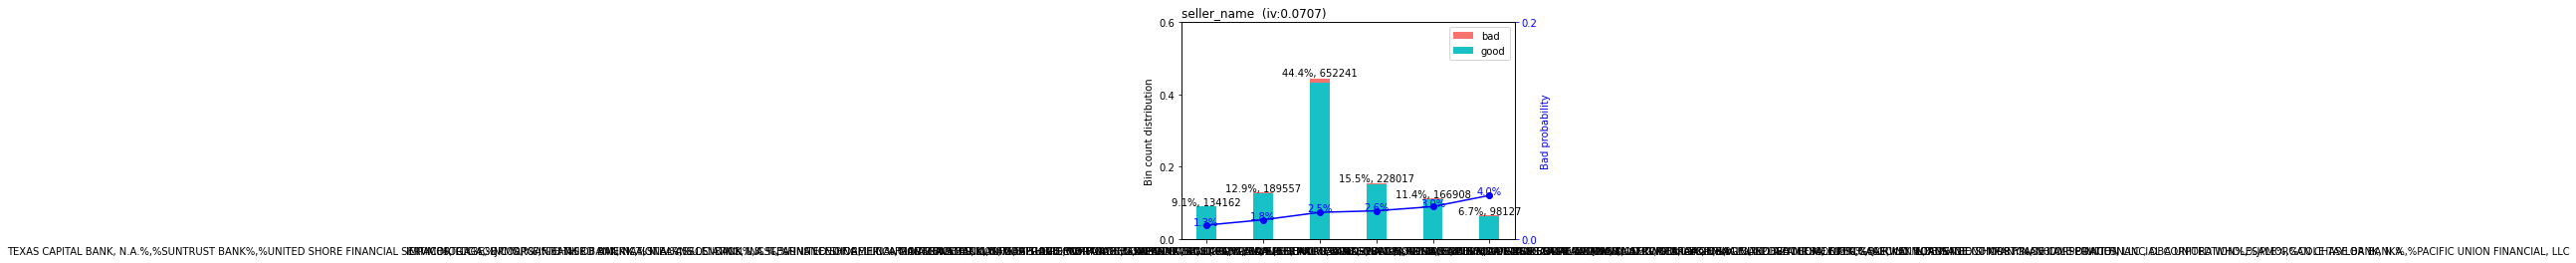

>>> Adjust breaks for (2/8) seller_name?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/8 servicer_name --------
>>> dt[servicer_name].describe(): 
count             1469012
unique                 45
top       Other servicers
freq               424999
Name: servicer_name, dtype: object 

>>> dt[servicer_name].value_counts(): 
Other servicers                              424999
WELLS FARGO BANK, N.A.                       198065
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     97393
U.S. BANK N.A.                                79296
QUICKEN LOANS INC.                            74837
NEW RESIDENTIAL MORTGAGE LLC                  54809
CALIBER HOME LOANS, INC.                      53458
BANK OF AMERICA, N.A.                         53141
MATRIX FINANCIAL SERVICES CORPORATION         50781
BRANCH BANKING AND TRUST COMPANY              37497
PNC BANK, NA                                  35822
PINGORA LOAN SERVICING, LLC                   34722
SUNTRUST BANK                                 

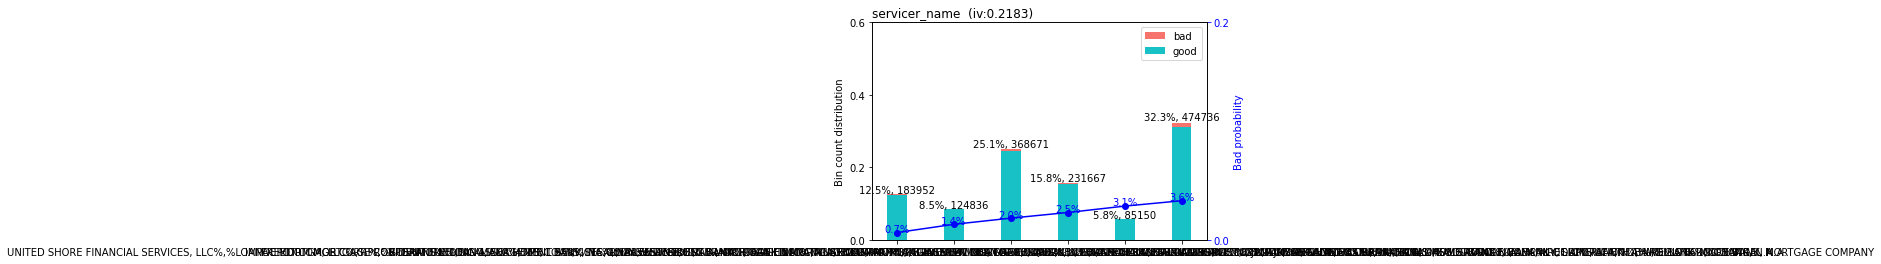

>>> Adjust breaks for (3/8) servicer_name?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/8 NumBorrower --------
>>> dt[NumBorrower].describe(): 
count     1469012
unique          2
top             2
freq       735616
Name: NumBorrower, dtype: object 

>>> dt[NumBorrower].value_counts(): 
2    735616
1    733396
Name: NumBorrower, dtype: int64 

>>> Current breaks:
'2','1' 



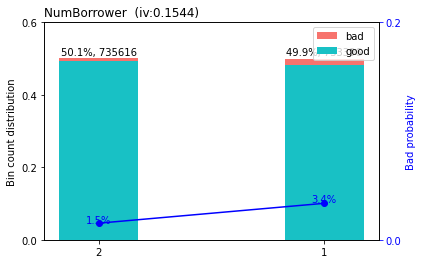

>>> Adjust breaks for (4/8) NumBorrower?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/8 state --------
>>> dt[state].describe(): 
count     1469012
unique         54
top            CA
freq       214382
Name: state, dtype: object 

>>> dt[state].value_counts(): 
CA    214382
TX    110474
FL     95333
IL     66083
MI     51349
CO     49846
OH     47796
NY     47238
WA     46289
NC     44717
GA     43807
AZ     43404
PA     41429
VA     36780
NJ     35307
MN     34040
MA     33888
IN     33481
OR     29446
MO     29325
TN     28628
WI     28574
MD     25443
UT     24435
SC     20630
KY     17744
NV     17356
AL     14138
LA     13296
CT     13224
IA     12957
KS     12894
OK     10546
ID      9717
AR      9484
NH      7653
NE      7016
MT      5894
NM      5830
ME      5656
HI      5229
MS      4788
DE      4739
RI      4629
WV      4022
ND      3991
VT      3806
DC      3468
AK      2924
SD      2819
WY      2503
GU       295
PR       151
VI       119
Name: state, dtype: int64 

>>> 

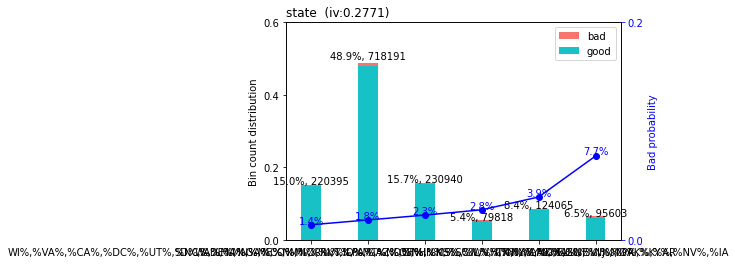

>>> Adjust breaks for (5/8) state?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/8 cltv --------
>>> dt[cltv].describe(): 
count    1.469012e+06
mean     7.433414e+01
std      1.649371e+01
min      6.000000e+00
25%      6.700000e+01
50%      8.000000e+01
75%      8.500000e+01
max      1.100000e+02
Name: cltv, dtype: float64 



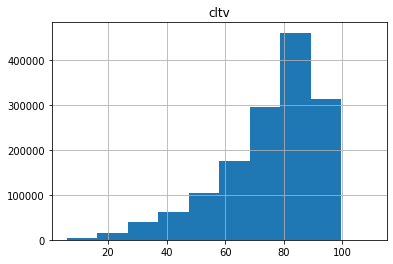

>>> Current breaks:
47.0,59.0,70.0,79.0,86.0,94.0 



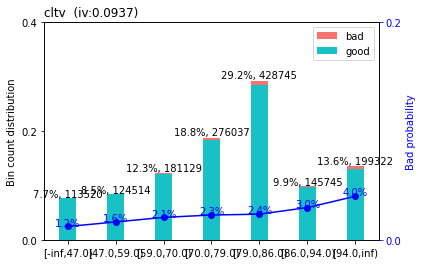

>>> Adjust breaks for (6/8) cltv?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/8 zipcode --------
>>> dt[zipcode].describe(): 
count     1469012
unique        891
top         75000
freq        18697
Name: zipcode, dtype: object 

>>> dt[zipcode].value_counts(): 
75000    18697
94500    17780
30000    14611
85200    13200
84000    12976
         ...  
5900         9
24800        3
86500        2
55104        1
80012        1
Name: zipcode, Length: 891, dtype: int64 

>>> Current breaks:
'99900%,%16900%,%24800%,%89300%,%88400%,%87900%,%87300%,%86500%,%36900%,%69200%,%41300%,%80012%,%5900%,%64600%,%10100%,%50800%,%41400%,%10200%,%10600%,%94300%,%94400%,%28900%,%91800%,%52000%,%11600%,%94000%,%45500%,%39700%,%28800%,%52300%,%17600%,%3300%,%98800%,%85500%,%44900%,%4900%,%25200%,%94900%,%25400%,%89700%,%98000%,%80100%,%27400%,%82000%,%37900%,%95000%,%83500%,%40500%,%53000%,%53700%,%99100%,%2600%,%57100%,%3900%,%96800%,%55400%,%55300%,%97800%,%22000%,%65100%,%98100%,%81200%,%99000%,%61800

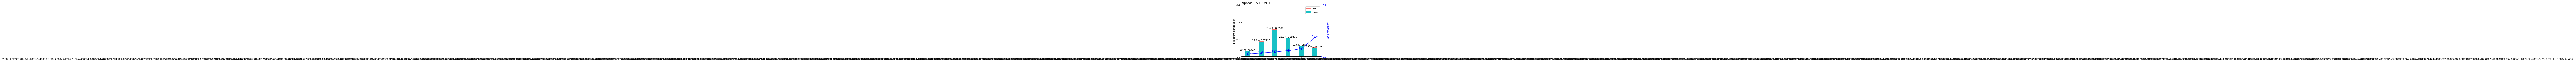

>>> Adjust breaks for (7/8) zipcode?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/8 dti --------
>>> dt[dti].describe(): 
count    1.469012e+06
mean     3.445066e+01
std      9.404904e+00
min      1.000000e+00
25%      2.800000e+01
50%      3.600000e+01
75%      4.200000e+01
max      5.000000e+01
Name: dti, dtype: float64 



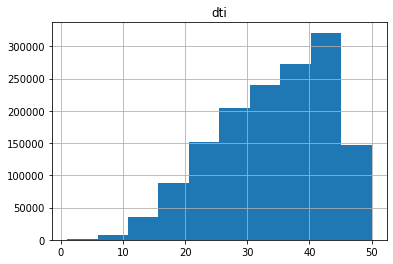

>>> Current breaks:
21.0,25.0,30.0,34.0,37.0,41.0,44.0,46.0 



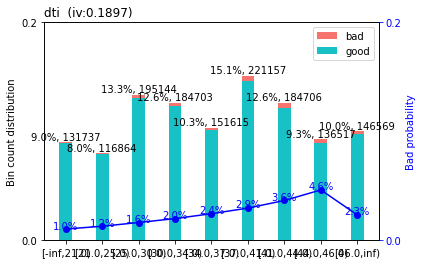

>>> Adjust breaks for (8/8) dti?
1: next 
2: yes 
3: back
Selection: 1


In [ ]:
loan_data_predictors_adj = sc.woebin_adj(train, "Default", bins, adj_all_var = True)

In [ ]:
bins_adj = sc.woebin(train, y="Default", breaks_list= loan_data_predictors_adj) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
state, zipcode
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 1469012 rows and 9 columns in 00:00:46
[INFO] converting into woe values ...
Woe transformating on 1469012 rows and 8 columns in 00:00:26
[INFO] converting into woe values ...
Woe transformating on 629577 rows and 8 columns in 00:00:12


In [ ]:
sc.iv(train_woe, 'Default')

,variable,info_value
1,CreditScore_woe,0.738156
0,zipcode_woe,0.389694
3,servicer_name_woe,0.218300
2,dti_woe,0.189711
4,NumBorrower_woe,0.154434


In [ ]:
##
#train_woe = train_woe.drop(columns=["upb_woe"])
#test_woe = test_woe.drop(columns=["upb_woe"])

drop below IV = 0.1

In [ ]:
# Create range of accepted variables
train_woe = train_woe.drop(columns=["seller_name_woe",
                      "cltv_woe","state_woe"])
test_woe = test_woe.drop(columns=["seller_name_woe",
                      "cltv_woe","state_woe"])

correlation

In [ ]:
train_woe = train_woe.drop(columns=["state_woe"])
test_woe = test_woe.drop(columns=["state_woe"])

In [ ]:
## missing value in train_woe
train_woe.isnull().any()

Default              False
servicer_name_woe    False
CreditScore_woe      False
zipcode_woe          False
NumBorrower_woe      False
dti_woe              False
dtype: bool

In [ ]:
test_woe.isnull().any()

Default              False
servicer_name_woe    False
CreditScore_woe      False
zipcode_woe          False
NumBorrower_woe      False
dti_woe              False
dtype: bool

In [ ]:
test_woe.fillna(value = 75000, inplace = True)

In [ ]:
sc.iv(train_woe, 'Default')

NameError: ignored

In [ ]:
iv_information = sc.iv(train_woe, 'Default')

In [ ]:
iv_information

In [ ]:
iv_information.to_csv("/content/drive/My Drive/iv_information.csv")

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [ ]:
train_woe.head()

,Default,servicer_name_woe,CreditScore_woe,zipcode_woe,NumBorrower_woe,dti_woe
1,1,0.398158,-1.191328,-0.099677,0.327776,-0.228990
2,0,0.398158,-0.217390,-0.380942,0.327776,0.652847
3,0,0.398158,-0.217390,-0.380942,-0.477281,0.652847
4,0,0.398158,1.453976,-0.380942,-0.477281,-0.228990
5,0,0.398158,-1.191328,-0.380942,-0.477281,-0.228990


In [ ]:
 train_woe.iloc[:, 1:].head()

,servicer_name_woe,CreditScore_woe,zipcode_woe,NumBorrower_woe,dti_woe
1,0.398158,-1.191328,-0.099677,0.327776,-0.228990
2,0.398158,-0.217390,-0.380942,0.327776,0.652847
3,0.398158,-0.217390,-0.380942,-0.477281,0.652847
4,0.398158,1.453976,-0.380942,-0.477281,-0.228990
5,0.398158,-1.191328,-0.380942,-0.477281,-0.228990


In [ ]:
#train_woe2 = train_woe.iloc[:,np.r_[0,1,3,4,5,6]]

In [ ]:
#train_woe2.head()

,Default,servicer_name_woe,NumBorrower_woe,zipcode_woe,CreditScore_woe,dti_woe
1,1,0.376241,0.327776,-0.099677,-1.191328,-0.228990
2,0,0.376241,0.327776,-0.380942,-0.217390,0.652847
3,0,0.376241,-0.477281,-0.380942,-0.217390,0.652847
4,0,0.376241,-0.477281,-0.380942,1.039199,-0.228990
5,0,0.376241,-0.477281,-0.380942,-1.191328,-0.228990


In [ ]:
#train_woe2.iloc[:, 1:]

In [ ]:
loan_data_predictors_logregCV = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                            Cs = [1e-3,1e-2, 1e-1,1,
                                10,100,1000],    
                            tol=0.00001, # Tolerance for parameters
                            cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                            fit_intercept=True, # Use constant
                            class_weight= "balanced", # Weights
                            random_state= 250747350, # ID
                            max_iter= 500, # Maximum iterations
                            verbose=1, # Show process. 1 is yes.
                            solver = 'liblinear', # How to optimize.
                            n_jobs = 2,      # Processes to use. Set to number of physical cores. 
                            refit = True  )

In [ ]:
loan_data_predictors_logreg = LogisticRegression(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                             tol=0.00001, # Tolerance for parameters
                             C = 0.01,#obtained from CV
                             fit_intercept=True, # Use constant?
                             class_weight='balanced', # Weights, see below
                             random_state=250747350, # Random seed
                            max_iter=500, # Maximum iterations
                           verbose=1, # Show process. 1 is yes.
                           solver = 'liblinear', # How to optimize.
                           n_jobs = 2      # Processes to use. Set to number of physical cores. 
                                   )

In [ ]:
train_woe

In [ ]:
fit_train_woe_CV = loan_data_predictors_logregCV.fit(X = train_woe.iloc[:, 1:], # All rows and from the second var to end
                    y = train_woe['Default'] # The target
                   )

In [ ]:
fit_train_woe_ = loan_data_predictors_logreg.fit(X = train_woe.iloc[:, 1:], # All rows and from the second var to end
                    y = train_woe['Default'] # The target
                   )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

In [ ]:
# No negative coeffcient
coef_df = pd.concat([pd.DataFrame({'column': train_woe.columns[1:]}), 
                    pd.DataFrame(np.transpose(fit_train_woe_CV.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,servicer_name_woe,0.941590
1,CreditScore_woe,0.953519
2,zipcode_woe,0.959071
3,NumBorrower_woe,1.122880
4,dti_woe,0.679210


In [ ]:
loan_data_predictors_logregCV.intercept_ # close to zero

array([-0.01374917])

In [ ]:
loan_data_predictors_logregCV.C_

array([0.01])

In [ ]:
# Inverse of lambda:
lambda_ = 1 / loan_data_predictors_logregCV.C_

In [ ]:
lambda_

array([100.])

In [ ]:
!pip install joblib

In [ ]:
from sklearn.externals import joblib
joblib.dump(fit_train_woe_CV, 'fit_train_woe_CV.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['fit_train_woe_CV.pkl']

Apply to the test data

In [ ]:
#test_woe2 = test_woe.iloc[:,np.r_[0,1,3,4,5,6]]

In [ ]:
#test_woe2.head(3)

,Default,servicer_name_woe,NumBorrower_woe,zipcode_woe,CreditScore_woe,dti_woe
0,0,0.376241,-0.477281,-0.380942,0.156789,0.405197
7,0,0.028393,-0.477281,0.689667,-0.217390,-0.016488
8,0,0.376241,-0.477281,-0.380942,-1.191328,-0.915866


In [ ]:
#test_woe2.iloc[:,1:].head(3)

,servicer_name_woe,NumBorrower_woe,zipcode_woe,CreditScore_woe,dti_woe
0,0.376241,-0.477281,-0.380942,0.156789,0.405197
7,0.028393,-0.477281,0.689667,-0.217390,-0.016488
8,0.376241,-0.477281,-0.380942,-1.191328,-0.915866


In [ ]:
test_woe.head(3)

In [ ]:
test_woe.iloc[:,1:].head()

,servicer_name_woe,CreditScore_woe,zipcode_woe,NumBorrower_woe,dti_woe
0,0.398158,0.156789,-0.380942,-0.477281,0.405197
7,0.028393,-0.217390,1.160197,-0.477281,-0.016488
8,0.398158,-1.191328,-0.380942,-0.477281,-0.915866
12,0.398158,-0.217390,-0.380942,-0.477281,-0.684076
15,0.398158,-1.191328,-0.380942,-0.477281,-0.684076


In [ ]:
test_woe.isnull().any()
# fix it above

Default              False
servicer_name_woe    False
CreditScore_woe      False
zipcode_woe          False
NumBorrower_woe      False
dti_woe              False
dtype: bool

In [ ]:
loan_data_predictors_logreg

In [ ]:
#pred_class_test = fit_train_woe_CV.predict(test_woe.iloc[:,1:])
#probs_test = fit_train_woe_CV.predict_proba(test_woe.iloc[:,1:])
#print(probs_test[0:5], pred_class_test[0:5])

In [ ]:
len(test_woe)

629577

In [ ]:
pred_class_test = fit_train_woe_.predict(test_woe.iloc[:,1:])
probs_test = fit_train_woe_.predict_proba(test_woe.iloc[:,1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.52882087 0.47117913]
 [0.40823095 0.59176905]
 [0.90872341 0.09127659]
 [0.77066043 0.22933957]
 [0.8947977  0.1052023 ]] [0 1 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true = test_woe['Default'], y_pred = pred_class_test)

array([[451742, 162466],
       [  3959,  11410]])

AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
probs_test

array([[0.52882087, 0.47117913],
       [0.40823095, 0.59176905],
       [0.90872341, 0.09127659],
       ...,
       [0.52817606, 0.47182394],
       [0.69425438, 0.30574562],
       [0.46673624, 0.53326376]])

In [ ]:
roc_auc_score(test_woe['Default'], probs_test[:,1])

0.8122297721810371

Scorecard

In [ ]:
train_woe.columns

Index(['Default', 'servicer_name_woe', 'CreditScore_woe', 'zipcode_woe',
       'NumBorrower_woe', 'dti_woe'],
      dtype='object')

In [ ]:
import scorecardpy as sc
default_sc = sc.scorecard(bins_adj,         # bins from the WoE
                  fit_train_woe_, # Trained logistic regression
                  train_woe.columns[1:], # The column names in the trained LR
                  points0=750, # Base points
                  odds0=0.01, # Base odds bads:goods
                  pdo=50) # PDO 

In [ ]:
default_sc

{'CreditScore':        variable            bin  points
 25  CreditScore   [-inf,668.0)  -100.0
 26  CreditScore  [668.0,688.0)   -68.0
 27  CreditScore  [688.0,712.0)   -38.0
 28  CreditScore  [712.0,734.0)   -11.0
 29  CreditScore  [734.0,756.0)    15.0
 30  CreditScore  [756.0,774.0)    40.0
 31  CreditScore    [774.0,inf)    82.0,
 'NumBorrower':        variable bin  points
 38  NumBorrower   2    39.0
 39  NumBorrower   1   -27.0,
 'basepoints':      variable  bin  points
 0  basepoints  NaN   419.0,
 'dti':    variable          bin  points
 40      dti  [-inf,21.0)    45.0
 41      dti  [21.0,25.0)    34.0
 42      dti  [25.0,30.0)    21.0
 43      dti  [30.0,34.0)    11.0
 44      dti  [34.0,37.0)     1.0
 45      dti  [37.0,41.0)    -9.0
 46      dti  [41.0,44.0)   -20.0
 47      dti  [44.0,46.0)   -32.0
 48      dti   [46.0,inf)     3.0,
 'servicer_name':         variable                                                bin  points
 0  servicer_name  UNITED SHORE FINANCIAL SERVIC

In [ ]:

#Same train-test split as before (because of seed!)
train_NO_woe, test_NO_woe = sc.split_df(loan_data_predictors.iloc[:,1:], 
                          y = 'Default', 
                          ratio = 0.7, 
                          seed = 250747350).values()

In [ ]:
train_NO_woe.to_csv("/content/drive/My Drive/train_NO_woe.csv")
test_NO_woe.to_csv("/content/drive/My Drive/test_NO_woe.csv")

In [ ]:
loan_data_predictors.to_csv("/content/drive/My Drive/loan_data_predictors.csv")

In [ ]:
loan_data_predictors.to_csv("loan_data_predictors.csv")

In [ ]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(train_NO_woe, default_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(test_NO_woe, default_sc, 
                               print_step=0)

In [ ]:
train_score.describe()

,score
count,1.469012e+06
mean,4.725926e+02
std,9.317004e+01
min,1.530000e+02
25%,4.100000e+02
50%,4.760000e+02
75%,5.390000e+02
max,7.410000e+02


In [ ]:
train_score.to_csv("/content/drive/My Drive/scorecard_.csv")

### Random Forests



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
len(loan_data_predictors)

2098589

In [ ]:
# n_estimator: [N/100]
n = np.floor(len(train_NO_woe_RF)/100)
n

11785.0

In [ ]:
#Define the classifier
loan_data_rf = RandomForestClassifier(n_estimators= 1000, # [N/100] 
        criterion='entropy', # Gini: faster; entroy: most rubust
        max_depth=None, # Max depth of the trees. Not necessary to change.
        min_samples_split=2, # Minimum samples to create a split.
        min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
        max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
        max_leaf_nodes=None, # Maximum number of nodes.
        min_impurity_decrease=0.001, # Minimum impurity decrease. This is 10^-4.
        bootstrap= False, # If sample with repetition. For large samples (>100.000) set to false.
        oob_score= False,  # If report accuracy with non-selected cases.
        # if bootstrap = F, oob_score = F as well
        n_jobs= 2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
        random_state=250747350, # Seed
        verbose=1, # If to give info during training. Set to 0 for silent training.
        warm_start=False, # If train over previously trained tree.
        class_weight='balanced' # Balance the classes.
)

Train the RandomForest by using original training set variables
and targets (no WoE transformation)

In [ ]:
train_NO_woe.dtypes

CreditScore          int64
FirstPaymentDate     int64
MaturityDate         int64
cltv                 int64
dti                  int64
state               object
zipcode             object
NumBorrower         object
seller_name         object
servicer_name       object
Default              int64
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_backup = train_NO_woe

Groupy by categorical variable 

#### First by "state" variable:

In [ ]:
test = bins.get('state').iloc[1,1]
test

'WI%,%VA%,%CA%,%DC%,%UT%,%NC%,%MA%,%ME%,%MI%,%VT%,%MT%,%OH%,%KS%,%IL%,%TN%,%MD%,%NE%,%MO%,%KY%,%NV%,%IA'

In [ ]:
if "RI" in (bins.get('state').iloc[1,1]):
    print("yes")
else:
    print("NO")

NO


In [ ]:
# State variable:
def WhatState(x):
  if x in bins.get('state').iloc[0,1]:
    return "st_0"
  elif x in bins.get('state').iloc[1,1]:
    return "st_1"
  elif x in bins.get('state').iloc[2,1]:
    return "st_2"
  elif x in bins.get('state').iloc[3,1]:
    return "st_3"
  elif x in bins.get('state').iloc[4,1]:
    return "st_4"
  elif x in bins.get('state').iloc[5,1]:
    return "st_5"


In [ ]:
# Apply to our data
loan_data_predictors["state_gp"] = loan_data_predictors["state"].apply(lambda x: WhatState(x))

In [ ]:
loan_data_predictors.head(20)

##### Next, "seller_name"

In [ ]:
def WhatSeller(x):
  if x in bins.get('seller_name').iloc[0,1]:
    return "seller_0"
  elif x in bins.get('seller_name').iloc[1,1]:
    return "seller_1"
  elif x in bins.get('seller_name').iloc[2,1]:
    return "seller_2"
  elif x in bins.get('seller_name').iloc[3,1]:
    return "seller_3"
  elif x in bins.get('seller_name').iloc[4,1]:
    return "seller_4"
  elif x in bins.get('seller_name').iloc[5,1]:
    return "seller_5"

In [ ]:
# Apply to our data
loan_data_predictors["seller_gp"] = loan_data_predictors["seller_name"].apply(lambda x: WhatSeller(x))

#### "Servicer_name" variable

In [ ]:
def WhatServicer(x):
  if x in bins.get('servicer_name').iloc[0,1]:
    return "servicer_0"
  elif x in bins.get('servicer_name').iloc[1,1]:
    return "servicer_1"
  elif x in bins.get('servicer_name').iloc[2,1]:
    return "servicer_2"
  elif x in bins.get('servicer_name').iloc[3,1]:
    return "servicer_3"
  elif x in bins.get('servicer_name').iloc[4,1]:
    return "servicer_4"
  elif x in bins.get('servicer_name').iloc[5,1]:
    return "servicer_5"

In [ ]:
# Apply to our data
loan_data_predictors["servicer_gp"] = loan_data_predictors["servicer_name"].apply(lambda x: WhatServicer(x))

#### zipcode variable

In [ ]:
def WhatZip(x):
  if x in bins.get('zipcode').iloc[0,1]:
    return "zip_0"
  elif x in bins.get('zipcode').iloc[1,1]:
    return "zip_1"
  elif x in bins.get('zipcode').iloc[2,1]:
    return "zip_2"
  elif x in bins.get('zipcode').iloc[3,1]:
    return "zip_3"
  elif x in bins.get('zipcode').iloc[4,1]:
    return "zip_4"
  elif x in bins.get('zipcode').iloc[5,1]:
    return "zip_5"

In [ ]:
# Apply to our data
loan_data_predictors["zipcode_gp"] = loan_data_predictors["zipcode"].apply(lambda x: WhatZip(x))

In [ ]:
loan_data_predictors.iloc[101825,15] = "zip_0"

In [ ]:
loan_data_predictors.iloc[1320508,15] = "zip_0"

In [ ]:
np.where(loan_data_predictors.isnull()== True)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# convert NumBorrower to int type
loan_data_predictors["NumBorrower"] = loan_data_predictors["NumBorrower"].astype("int")

In [ ]:
loan_data_predictors.dtypes

In [ ]:
loan_data_predictors.to_csv("loan_data_predictor_groupby.csv")

In [ ]:
loan_data_predictors.to_csv("/content/drive/My Drive/loan_data_predictor_groupby.csv")

In [ ]:
# Drop redudant variable
loan_data_predictors_bk = loan_data_predictors

In [ ]:
loan_data_predictors_bk

In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(columns=["zipcode",
              "seller_name","servicer_name","state"])

In [ ]:
loan_data_predictors_bk.head(3)

,id_loan,CreditScore,cltv,dti,NumBorrower,Default
0,F114Q1000001,717,77,41,2,0
1,F114Q1000002,813,95,32,1,1
2,F114Q1000004,742,78,45,1,0


In [ ]:
len(loan_data_predictors_bk)

2098589

In [ ]:
import pandas as pd


In [ ]:
loan_data_predictors_bk = pd.read_csv("loan_data_predictor_groupby.csv")

In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(loan_data_predictors_bk.columns[0], axis = 1)

In [ ]:
loan_data_predictors_bk

,id_loan,CreditScore,cltv,dti,NumBorrower,Default
0,F114Q1000001,717,77,41,2,0
1,F114Q1000002,813,95,32,1,1
2,F114Q1000004,742,78,45,1,0
3,F114Q1000007,735,86,45,2,0
4,F114Q1000010,667,90,30,2,0
...,...,...,...,...,...,...
2098588,F118Q4244552,777,75,21,2,0
2098589,F118Q4244555,666,85,37,2,0
2098590,F118Q4244558,798,84,19,2,0
2098591,F118Q4244561,772,79,37,1,0


In [ ]:
loan_data_predictors_bk.dtypes

CreditScore          int64
FirstPaymentDate     int64
MaturityDate         int64
cltv                 int64
dti                  int64
zipcode              int64
NumBorrower          int64
Default              int64
state_gp            object
seller_gp           object
servicer_gp         object
zipcode_gp          object
dtype: object

In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(columns = 
      ["state","seller_name","servicer_name"])

In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(columns = 
      ["zipcode"])

In [ ]:
# Appy OneHotCode
loan_data_predictors_bk = pd.get_dummies(loan_data_predictors_bk)

In [ ]:
loan_data_predictors_bk

In [ ]:
loan_data_predictors_bk.to_csv("CleanseData.csv")

In [ ]:
loan_data_predictors_bk.to_csv("/content/drive/My Drive/CleanseData.csv")

In [ ]:
loan_data_predictors_bk = pd.read_csv("/content/drive/My Drive/CleanseData.csv")

In [ ]:
len(loan_data_predictors_bk)

1683635

In [ ]:
loan_data_predictors_bk.head(5)

,CreditScore,cltv,dti,NumBorrower,Default,state_gp_st_0,state_gp_st_1,state_gp_st_2,state_gp_st_3,state_gp_st_4,state_gp_st_5,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,717,77,41,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,813,95,32,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,742,78,45,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,735,86,45,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,667,90,30,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(loan_data_predictors_bk.columns[0], axis = 1)

In [ ]:
loan_data_predictors_bk = loan_data_predictors_bk.drop(columns = ["MaturityDate"])

In [ ]:
#loan_data_predictors_bk = loan_data_predictors_bk.drop(columns 
#           =["FirstPaymentDate","seller_gp_seller_0",
#             "seller_gp_seller_1",
#             "seller_gp_seller_2",
#             "seller_gp_seller_3",
#             "seller_gp_seller_4",
#             "seller_gp_seller_5",])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
len(loan_data_predictors_bk)

1683635

In [ ]:
len(loan_data_predictors)

2098589

In [ ]:
loan_data_predictors_bk =loan_data_predictors_bk.drop(columns =["state_gp_st_0",
                        "state_gp_st_1",
                        "state_gp_st_2",
                        "state_gp_st_3",
                        "state_gp_st_4",
                        "state_gp_st_5"])

In [ ]:
loan_data_predictors_bk.to_csv("/content/drive/My Drive/data3.csv")

In [ ]:
loan_data_predictors_bk.to_csv("data4.csv")

In [ ]:
loan_data_predictors_bk.head(3)

,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,717,77,41,2,0,0,0,0,0,0,1,0,1,0,0,0,0
1,813,95,32,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,742,78,45,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Now we split the dataset:
train_NO_woe_RF, test_NO_woe_RF = sc.split_df(loan_data_predictors_bk,
                       y = 'Default', 
                      ratio = 0.7, 
                      seed = 250747350).values()

In [ ]:
test_NO_woe_RF

,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,717,77,41,2,0,0,0,0,0,0,1,0,1,0,0,0,0
7,736,95,36,2,0,0,0,0,1,0,0,0,0,0,0,0,1
8,811,90,18,2,0,0,0,0,0,0,1,0,0,1,0,0,0
12,738,50,23,2,0,0,0,0,0,0,1,0,0,1,0,0,0
15,780,75,23,2,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683617,729,59,43,2,0,0,0,0,0,0,1,0,0,1,0,0,0
1683622,781,78,19,2,0,0,0,0,0,0,1,1,0,0,0,0,0
1683625,755,77,45,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1683632,741,45,38,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_NO_woe_RF.index.tolist()

In [ ]:
train_NO_woe_RF.to_csv("train_NO_woe_RF.csv")
test_NO_woe_RF.to_csv("test_NO_woe_RF.csv")

In [ ]:
train_NO_woe_RF.to_csv("/content/drive/My Drive/train_NO_woe_RF3.csv")
test_NO_woe_RF.to_csv("/content/drive/My Drive/test_NO_woe_RF3.csv")

In [ ]:
import pandas as pd
train_NO_woe_RF = pd.read_csv("/content/drive/My Drive/train_NO_woe_RF.csv")
test_NO_woe_RF = pd.read_csv("/content/drive/My Drive/test_NO_woe_RF.csv")

In [ ]:
len(test_NO_woe_RF)

505091

In [ ]:
train_NO_woe_RF.head(10)

,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,813,95,32,1,1,0,0,0,0,0,1,0,0,0,1,0,0
1,742,78,45,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,735,86,45,2,0,0,0,0,0,0,1,0,0,1,0,0,0
3,667,90,30,2,0,0,0,0,0,0,1,0,0,1,0,0,0
4,801,56,31,2,0,0,0,0,0,0,1,0,0,1,0,0,0
5,766,80,43,1,0,0,0,0,0,0,1,1,0,0,0,0,0
6,671,80,35,2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,802,75,27,2,0,0,0,0,1,0,0,0,0,0,1,0,0
8,780,80,44,2,0,0,0,0,0,0,1,0,1,0,0,0,0
9,661,80,22,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
train_NO_woe_RF = train_NO_woe_RF.drop(train_NO_woe_RF.columns[0],axis = 1)
test_NO_woe_RF = test_NO_woe_RF.drop(test_NO_woe_RF.columns[0],axis = 1)

In [ ]:
train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"]

In [ ]:
loan_data_rf_fit = loan_data_rf.fit(train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"], # X (exclude Default)
        train_NO_woe_RF["Default"]    # y
                )  

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   56.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.3min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed: 17.5min finished


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Apply the model to the test set.
rf_pred_class_test = loan_data_rf.predict(test_NO_woe_RF.loc[:,test_NO_woe_RF.columns != "Default"])
rf_probs_test = loan_data_rf.predict_proba(test_NO_woe_RF.loc[:,test_NO_woe_RF.columns != "Default"])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   11.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   20.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   25.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   19.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   25.0s finished


In [ ]:
rf_probs_test

array([[0.50292046, 0.49707954],
       [0.33417123, 0.66582877],
       [0.77004885, 0.22995115],
       ...,
       [0.57996028, 0.42003972],
       [0.73265999, 0.26734001],
       [0.60339979, 0.39660021]])

In [ ]:
rf_probs_test.tolist()

In [ ]:
rf_probs_test.to_pickle("/content/drive/My Drive/rf_probs_test.pickle")

In [ ]:
len(rf_probs_test)

505091

In [ ]:
rf_probs_test

In [ ]:
rf_probs_test = pd.DataFrame(rf_probs_test)

In [ ]:
rf_probs_test

,0,1
0,0.502920,0.497080
1,0.334171,0.665829
2,0.770049,0.229951
3,0.765309,0.234691
4,0.803510,0.196490
...,...,...
505086,0.593564,0.406436
505087,0.801056,0.198944
505088,0.579960,0.420040
505089,0.732660,0.267340


In [ ]:
rf_probs_test.to_csv("/content/drive/My Drive/rf_probs_test.csv")

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
rf_probs_test.to_pickle("/content/drive/My Drive/rf_probs_test.pickle")

In [ ]:
rf_probs_test = np.savetxt("/content/drive/My Drive/rf_probs_test.csv",rf_probs_test,delimiter = ",")

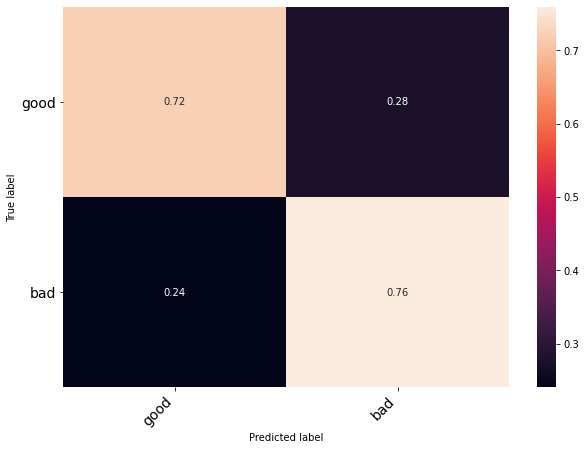

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = test_NO_woe_RF['Default'], 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

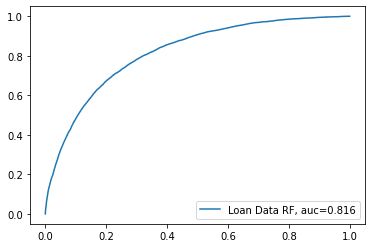

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_NO_woe_RF['Default'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_NO_woe_RF['Default'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Loan Data RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Q5:

In [ ]:
fpr

array([0.00000000e+00, 3.46397971e-05, 4.07527024e-05, ...,
       9.99460027e-01, 9.99535419e-01, 1.00000000e+00])

In [ ]:
tpr

array([0.        , 0.00153567, 0.00160547, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
thresholds

array([1.85676105, 0.85676105, 0.85660405, ..., 0.12409536, 0.12405183,
       0.12400066])

In [ ]:
data = {'fpr':fpr,'trp':tpr,'thresholds':thresholds}

In [ ]:
data

{'fpr': array([0.00000000e+00, 3.46397971e-05, 4.07527024e-05, ...,
        9.99460027e-01, 9.99535419e-01, 1.00000000e+00]),
 'thresholds': array([1.85676105, 0.85676105, 0.85660405, ..., 0.12409536, 0.12405183,
        0.12400066]),
 'trp': array([0.        , 0.00153567, 0.00160547, ..., 1.        , 1.        ,
        1.        ])}

In [ ]:
RF_fpr_tpr_thresholds = pd.DataFrame(data)

In [ ]:
RF_fpr_tpr_thresholds

,fpr,trp,thresholds
0,0.000000,0.000000,1.856761
1,0.000035,0.001536,0.856761
2,0.000041,0.001605,0.856604
3,0.000041,0.001745,0.856311
4,0.000057,0.002722,0.856301
...,...,...,...
101050,0.999379,1.000000,0.124187
101051,0.999401,1.000000,0.124155
101052,0.999460,1.000000,0.124095
101053,0.999535,1.000000,0.124052


In [ ]:
RF_fpr_tpr_thresholds.to_csv("/content/drive/My Drive/RF_fpr_tpr_thresholds_thisone.csv")

In [ ]:
train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"].columns

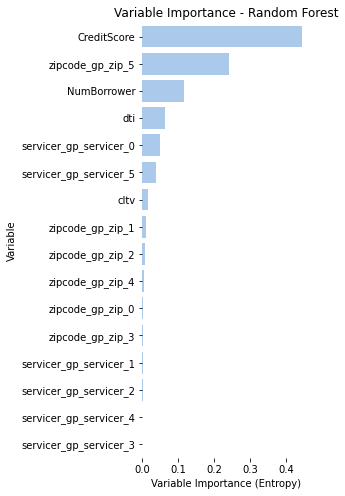

In [ ]:
# Plot variable importance
importances = loan_data_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"].columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

### XGBoosting

a.ka  stochastic gradient boosting model 

Now we want to create a series of small trees, which will be poorer in performance, but together they will be stronger. Training an XGBoost model is harder, because we need to control the model so it creates small trees, but it performs better in small data, something Random Forests do not necessarily accomplish.

### Need to find optimal values:
max_depth, learning_rate and n_estimaors just as we did in 
LogisticCV to sovle for optimal C.

In [ ]:
# scale_pos_weight: # of Good/ # of bad
(1178544 - 33426)/(33426)

34.258301920660564

In [ ]:
# Bad:
train_NO_woe_RF.Default.sum()

33426

In [ ]:
# Total len of train_NO_woe_RF: 
len(train_NO_woe_RF)

1178544

In [ ]:
from xgboost import XGBClassifier
#Define the classifier.
XGB_Loan_Data = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            #colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            #colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            #colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=34.25830,           # Balancing of positive and negative weights. (# of G)/(# Bad) ->training set
                            base_score=0.5,               # Global bias. Set to average of the target rate. (average default rate) change one only!
                            random_state=250747350,        # Seed
                            missing=None                  # How are nulls encoded?
                            )

This classifier can be used to tune the parameters of the model. We will use sklearn's ```GridSearchCV``` for this. It requires a dictionary of the parameters to look for. We will tune the number of trees (XGB overfits relatively easily, always tune this), the depth, and the learning rate.

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [100,500,1000],
                   'max_depth': [1,5],
                 'learning_rate' : [1e-3,1e-2,1e-1,1]
                  })

validation set for it

In [ ]:
train_NO_woe_RF

In [ ]:
import pandas as pd

In [ ]:
train_NO_woe_RF = pd.read_csv("/content/drive/My Drive/train_NO_woe_RF.csv")

In [ ]:
train_NO_woe_RF

,Unnamed: 0,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,1,813,95,32,1,1,0,0,0,0,0,1,0,0,0,1,0,0
1,2,742,78,45,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,3,735,86,45,2,0,0,0,0,0,0,1,0,0,1,0,0,0
3,4,667,90,30,2,0,0,0,0,0,0,1,0,0,1,0,0,0
4,5,801,56,31,2,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178539,1683628,704,95,48,2,0,0,0,0,0,0,1,0,0,0,1,0,0
1178540,1683629,808,75,33,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1178541,1683630,745,95,46,2,0,0,0,0,1,0,0,0,0,0,0,1,0
1178542,1683631,751,80,39,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_NO_woe_RF= train_NO_woe_RF.drop(columns =["FirstPaymentDate","seller_gp_seller_0",
             "seller_gp_seller_1",
             "seller_gp_seller_2",
             "seller_gp_seller_3",
             "seller_gp_seller_4",
             "seller_gp_seller_5"])
                                                

In [ ]:
train_NO_woe_RF.to_csv("/content/drive/My Drive/train_NO_woe_RF.csv")

In [ ]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = train_NO_woe_RF.sample(frac = 0.01, # The fraction to extract
               random_state = 250747350,    # The seed.
                        )

Now we can do a grid search over the parameter space. We will use the AUC (as this is a binary classification problem)

In [ ]:
train_NO_woe_RF = train_NO_woe_RF.drop(train_NO_woe_RF.columns[0], axis = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_Loan_Data,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 2,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
val_train.loc[:, val_train.columns != "Default"]

,CreditScore,cltv,dti,NumBorrower,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
698847,784,75,26,2,0,0,0,0,0,1,0,0,0,1,0,0
1054453,666,80,25,2,0,0,0,0,0,1,0,0,0,0,0,1
52254,781,24,14,2,0,0,0,1,0,0,0,1,0,0,0,0
112754,674,80,34,2,0,0,0,0,0,1,0,0,0,0,0,1
861326,787,90,31,2,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537358,734,75,22,1,0,0,0,0,0,1,0,0,1,0,0,0
756304,788,71,13,2,0,0,0,1,0,0,0,0,1,0,0,0
379929,707,72,37,2,0,0,1,0,0,0,1,0,0,0,0,0
72684,743,92,32,2,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Train grid search.
GridXGB.fit(val_train.loc[:, val_train.columns != "Default"], val_train['Default'])

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:  4.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=2,
                                     nthread=None, objective='binary:logistic',
                                     random_state=250747350, reg_alpha=1,
                                     reg_lambda=0, scale_pos_weight=34.2583,
                                     seed=None, silent=None, subsample=0.632,
                                     verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 5],
          

Now we can output the optimal parameters.

In [ ]:
GridXGB.best_params_.get('max_depth')

1

In [ ]:
GridXGB.best_params_.get('learning_rate')

0.1

In [ ]:
GridXGB.best_params_.get('n_estimators')

100

In [ ]:
# Show best params
GridXGB.best_score_

0.8118414476735925

In [ ]:
# Create XGB with best parameters.
XGB_loan_data = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            #colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            #colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            #colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=34.25830,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=250747350,        # Seed
                            missing=None                  # How are nulls encoded?
                            )

In [ ]:
train_NO_woe_RF.head(3)

,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,813,95,32,1,1,0,0,0,0,0,1,0,0,0,1,0,0
1,742,78,45,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,735,86,45,2,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Train over all training data.
XGB_loan_data.fit(train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"], train_NO_woe_RF['Default'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=250747350,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=34.2583, seed=None,
              silent=None, subsample=0.632, verbosity=1)

Now we can evaluate our model. First we calculate the variable importance.

In [ ]:
#Import all the packages we need
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

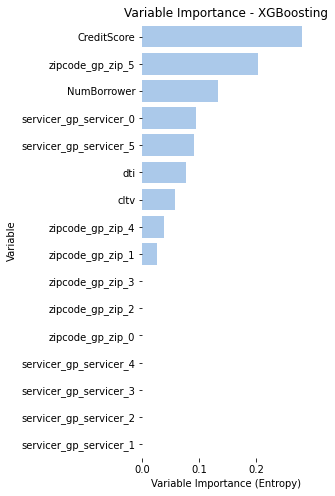

In [ ]:
# Plot variable importance
importances = XGB_loan_data.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[train_NO_woe_RF.loc[:,train_NO_woe_RF.columns != "Default"].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

Evaluation Measure

In [ ]:
len(xg_probs_test)

505091

In [ ]:
test_NO_woe_RF

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

In [ ]:
test_NO_woe_RF

In [ ]:
len(test_NO_woe_RF)

505091

In [ ]:
test_NO_woe_RF

,CreditScore,cltv,dti,NumBorrower,Default,servicer_gp_servicer_0,servicer_gp_servicer_1,servicer_gp_servicer_2,servicer_gp_servicer_3,servicer_gp_servicer_4,servicer_gp_servicer_5,zipcode_gp_zip_0,zipcode_gp_zip_1,zipcode_gp_zip_2,zipcode_gp_zip_3,zipcode_gp_zip_4,zipcode_gp_zip_5
0,717,77,41,2,0,0,0,0,0,0,1,0,1,0,0,0,0
1,736,95,36,2,0,0,0,0,1,0,0,0,0,0,0,0,1
2,811,90,18,2,0,0,0,0,0,0,1,0,0,1,0,0,0
3,738,50,23,2,0,0,0,0,0,0,1,0,0,1,0,0,0
4,780,75,23,2,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505086,729,59,43,2,0,0,0,0,0,0,1,0,0,1,0,0,0
505087,781,78,19,2,0,0,0,0,0,0,1,1,0,0,0,0,0
505088,755,77,45,1,0,0,0,0,1,0,0,0,0,1,0,0,0
505089,741,45,38,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_NO_woe_RF = test_NO_woe_RF.drop(test_NO_woe_RF.columns[0], axis = 1)

In [ ]:
test_NO_woe_RF.loc[:,test_NO_woe_RF.columns != "Default"]

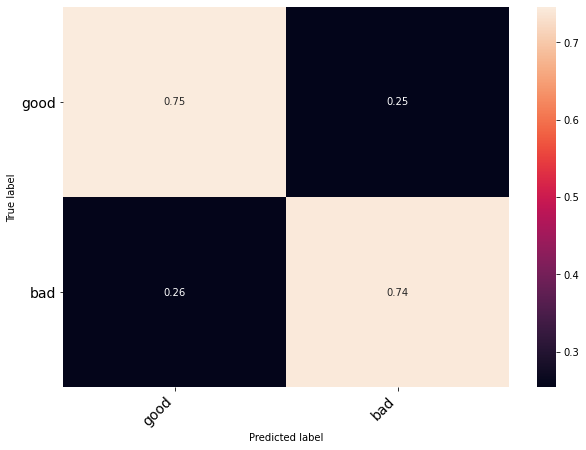

In [ ]:
# Calculate probability
XGBClassTest = XGB_loan_data.predict(test_NO_woe_RF.loc[:,test_NO_woe_RF.columns != "Default"])
xg_probs_test = XGB_loan_data.predict_proba(test_NO_woe_RF.loc[:,test_NO_woe_RF.columns != "Default"])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = test_NO_woe_RF['Default'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
xg_probs_test

array([0.46603683, 0.6370081 , 0.18738356, ..., 0.42778945, 0.28080395,
       0.3351103 ], dtype=float32)

In [ ]:
len(xg_probs_test)

505091

In [ ]:
xg_probs_test = np.savetxt("/content/drive/My Drive/xg_probs_test.csv",xg_probs_test, delimiter=",")

In [ ]:
xg_probs_test.to_csv("/content/drive/My Drive/XG_probs_test2.csv")

AttributeError: ignored

In [ ]:
np.savetxt('test.out', x, delimiter=',')

ROC curve

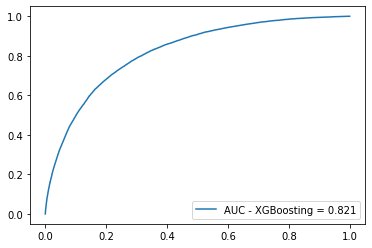

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_NO_woe_RF['Default'], 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_NO_woe_RF['Default'], 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

#### Q5

In [ ]:
fpr

array([0.00000000e+00, 1.22258107e-05, 1.42634458e-05, ...,
       9.97646531e-01, 9.99272564e-01, 1.00000000e+00])

In [ ]:
tpr

array([0.00000000e+00, 4.88622086e-04, 5.58425241e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [ ]:
thresholds

array([1.9549928 , 0.9549928 , 0.95372266, ..., 0.06653094, 0.06640421,
       0.06441949], dtype=float32)

In [ ]:
data = {'fpr':fpr,'trp':tpr, 'thresholds':thresholds}

In [ ]:
XGB_fpr_tpr_thresholds = pd.DataFrame(data)

In [ ]:
XGB_fpr_tpr_thresholds

,fpr,trp,thresholds
0,0.000000,0.000000,1.954993
1,0.000012,0.000489,0.954993
2,0.000014,0.000558,0.953723
3,0.000022,0.001117,0.951624
4,0.000022,0.001256,0.951113
...,...,...,...
26529,0.997251,1.000000,0.068576
26530,0.997484,1.000000,0.066896
26531,0.997647,1.000000,0.066531
26532,0.999273,1.000000,0.066404


In [ ]:
XGB_fpr_tpr_thresholds.to_csv("/content/drive/My Drive/XGB_fpr_tpr_thresholds_thisone.csv")

## Plotting multiple ROC curves

In [ ]:
test_woe

,Default,servicer_name_woe,CreditScore_woe,zipcode_woe,NumBorrower_woe,dti_woe
0,0,0.398158,0.156789,-0.380942,-0.477281,0.405197
7,0,0.028393,-0.217390,1.160197,-0.477281,-0.016488
8,0,0.398158,-1.191328,-0.380942,-0.477281,-0.915866
12,0,0.398158,-0.217390,-0.380942,-0.477281,-0.684076
15,0,0.398158,-1.191328,-0.380942,-0.477281,-0.684076
...,...,...,...,...,...,...
2098579,0,0.398158,0.156789,1.160197,-0.477281,-0.684076
2098583,0,0.398158,-1.191328,1.160197,0.327776,0.405197
2098587,0,0.398158,-0.217390,-0.650156,0.327776,-0.016488
2098590,0,0.398158,-1.191328,1.160197,-0.477281,-0.915866


In [ ]:
test_NO_woe

In [ ]:
# Predict probabilities of scorecard.
logreg_probs_test = loan_data_predictors_logreg.predict_proba(test_woe.iloc[:,1:])

In [ ]:
len(logreg_probs_test[:,1])

629577

In [ ]:
len(xg_probs_test)

505091

In [ ]:
len(rf_probs_test[:,1])

505091

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': logreg_probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = test_NO_woe_RF['Default'], 
                            y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(test_NO_woe_RF['Default'], 
                             m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()